In [1]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

## Task 1:

In [5]:
df_train = pd.read_csv('occupancy_train.txt')
df_train = df_train[['Humidity', 'Light', 'HumidityRatio', 'Occupancy']]
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8143 entries, 1 to 8143
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Humidity       8143 non-null   float64
 1   Light          8143 non-null   float64
 2   HumidityRatio  8143 non-null   float64
 3   Occupancy      8143 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 318.1 KB


In [38]:
knn = KNeighborsClassifier()
x_train = df_train.iloc[:, :-1]
y_train = df_train.iloc[:, -1]

knn.fit(x_train, y_train)

KNeighborsClassifier()

In [42]:
from collections import Counter

df_test = pd.read_csv('occupancy_test.txt')
df_test = df_test[['Humidity', 'Light', 'HumidityRatio', 'Occupancy']]
rows, cols = df_test.shape


X_test = df_test.iloc[:, :-1]
y_test = df_test.iloc[:, -1]

accuracies = {}
max_k = 0
max_acc = 0.0

for k in range(1, 11):
    knn.set_params(n_neighbors = k)
    result = knn.predict(X_test)
    #difference = (y_test == result).value_counts()
    difference = (y_test == result).value_counts()
    acc = difference[True] / rows * 100
    accuracies[k] = acc

    if acc > max_acc:
        max_acc = acc
        max_k = k

    print(f'Accuracy at k = {k}: {acc:.4}%')

print(f"Highest accuracy with k = {max_k}")

Accuracy at k = 1: 94.03%
Accuracy at k = 2: 92.53%
Accuracy at k = 3: 95.72%
Accuracy at k = 4: 94.48%
Accuracy at k = 5: 95.53%
Accuracy at k = 6: 95.27%
Accuracy at k = 7: 96.32%
Accuracy at k = 8: 96.14%
Accuracy at k = 9: 96.47%
Accuracy at k = 10: 96.47%
Highest accuracy with k = 9


## Task 2:

In [53]:
def chi_distance(x, y):
    result = 0
    for xi, yi in zip(x, y):
        result += (xi-yi)**2/(xi+yi)
    return result

In [63]:
from collections import Counter
import numpy as np

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, x, y):
        self.x_train = x
        self.y_train = y

    def predict(self, X):
        #compute distances
        distances = [chi_distance(X, i) for i in self.x_train]
        
        #get k-nearest neighbors
        k_indices = np.argsort(distances)[:self.k]

        #majority voting
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = Counter(k_nearest_labels).most_common(1)[0][0]
        return most_common

    def _predict(self, X):
        return [self.predict(x) for x in X]

In [69]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

iris = load_iris()
x = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

knn2 = KNN()
knn2.fit(X_train, y_train)
y_pred = knn2._predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.4f}%")

Accuracy: 100.0000%


In [73]:
train_pred = knn2._predict(X_train)
train_acc = accuracy_score(y_train, train_pred)
test_acc = accuracy_score(y_test, y_pred)
print(train_acc, test_acc)

0.9666666666666667 1.0


In [75]:
for k in range(1, 11):
    knn2.k = k
    train_pred = knn2._predict(X_train)
    test_pred = knn2._predict(X_test)
    train_acc = accuracy_score(y_train, train_pred)
    test_acc = accuracy_score(y_test, test_pred)
    print(f"k={k} -> Train: {train_acc:.3f}, Test: {test_acc:.3f}")


k=1 -> Train: 1.000, Test: 1.000
k=2 -> Train: 1.000, Test: 1.000
k=3 -> Train: 0.967, Test: 1.000
k=4 -> Train: 0.975, Test: 1.000
k=5 -> Train: 0.958, Test: 1.000
k=6 -> Train: 0.975, Test: 1.000
k=7 -> Train: 0.958, Test: 1.000
k=8 -> Train: 0.958, Test: 1.000
k=9 -> Train: 0.950, Test: 1.000
k=10 -> Train: 0.958, Test: 1.000


## Task 3:

In [170]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder

df = pd.read_csv('cancer patient data sets.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

In [172]:
df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [84]:
df['Level'].unique()

array(['Low', 'Medium', 'High'], dtype=object)

In [86]:
df.Level.value_counts()

Level
High      365
Medium    332
Low       303
Name: count, dtype: int64

seemes almost balanced

In [89]:
df.isna().sum()

index                       0
Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

no empty record found

In [92]:
df.duplicated().sum()

0

no duplicated values found

In [99]:
df.select_dtypes(exclude='number')

,Patient Id,Level
0,P1,Low
1,P10,Medium
2,P100,High
3,P1000,High
4,P101,High
...,...,...
995,P995,High
996,P996,High
997,P997,High
998,P998,High


the only categorical features are "Patient Id" and "Level"

"patient id" doesnot play a big role so we will ignore it 

and "Level" is our target variable

<Axes: >

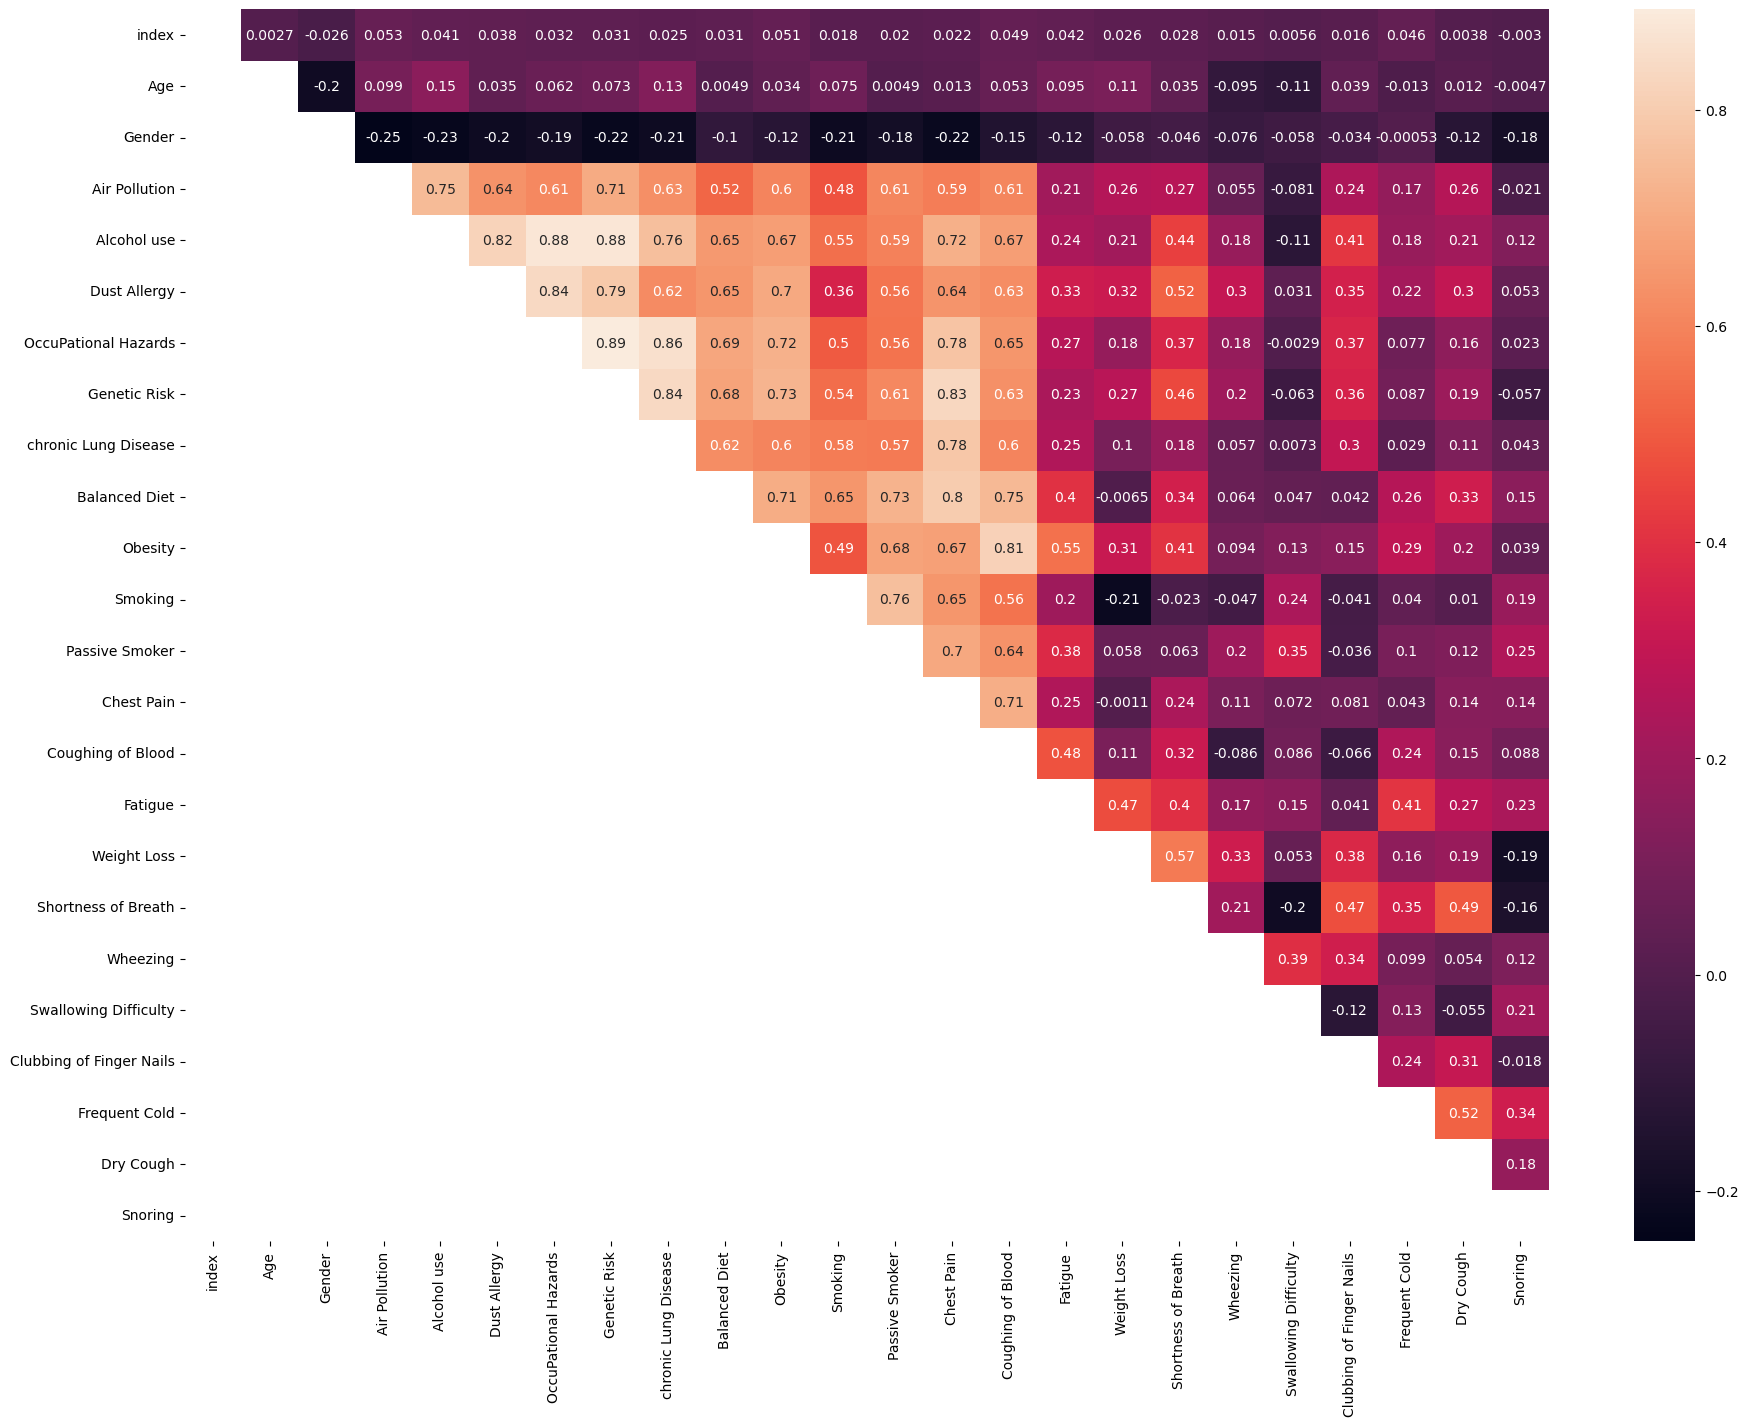

In [145]:
corr_matrix = df.corr(numeric_only=True)
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
plt.figure(figsize=(22, 16))
sns.heatmap(data=upper_tri, annot=True)
#sns.heatmap(corr_matrix, annot=True)

In [157]:
#performing feature selection using pearson
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.8)]
df = df.drop(columns=to_drop)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Balanced Diet             1000 non-null   int64 
 7   Obesity                   1000 non-null   int64 
 8   Smoking                   1000 non-null   int64 
 9   Passive Smoker            1000 non-null   int64 
 10  Fatigue                   1000 non-null   int64 
 11  Weight Loss               1000 non-null   int64 
 12  Shortness of Breath       1000 non-null   int64 
 13  Wheezing                  1000 non-null   int64 
 14  Swallowing Difficulty    

In [159]:
df.describe()

,index,Age,Gender,Air Pollution,Alcohol use,Balanced Diet,Obesity,Smoking,Passive Smoker,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
count,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,37.174000,1.402000,3.8400,4.563000,4.491000,4.465000,3.948000,4.195000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,288.819436,12.005493,0.490547,2.0304,2.620477,2.135528,2.124921,2.495902,2.311778,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,0.000000,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,249.750000,27.750000,1.000000,2.0000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,499.500000,36.000000,1.000000,3.0000,5.000000,4.000000,4.000000,3.000000,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,749.250000,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,999.000000,73.000000,2.000000,8.0000,8.000000,7.000000,7.000000,8.000000,8.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


all features have very different range

In [164]:
ranges = df.select_dtypes(include='number').max() - df.select_dtypes(include='number').min()
print(ranges)

index                       999
Age                          59
Gender                        1
Air Pollution                 7
Alcohol use                   7
Balanced Diet                 6
Obesity                       6
Smoking                       7
Passive Smoker                7
Fatigue                       8
Weight Loss                   7
Shortness of Breath           8
Wheezing                      7
Swallowing Difficulty         7
Clubbing of Finger Nails      8
Frequent Cold                 6
Dry Cough                     6
Snoring                       6
dtype: int64


In [174]:
#it needs scaling
le = LabelEncoder()
x = df.iloc[:, 2:-1]
y = df.iloc[:, -1]
le_y = le.fit_transform(y)

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [178]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled, le_y, test_size=0.2, random_state=0, stratify=le_y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=0, stratify=y_train)

knn3 = KNeighborsClassifier()
knn3.fit(X_train, y_train)
y_pred = knn3.predict(X_train)
y_pred_val = knn3.predict(X_val)
y_pred_test = knn3.predict(X_test)

print(f"Training Accuracy: {accuracy_score(y_train, y_pred):.2f}%")
print(f"Validation Accuracy: {accuracy_score(y_val, y_pred_val):.2f}%")
print(f"Testing Accuracy: {accuracy_score(y_test, y_pred_test):.2f}%")

Training Accuracy: 1.00%
Validation Accuracy: 1.00%
Testing Accuracy: 1.00%


In [182]:
metrics = ['euclidean', 'manhattan', 'minkowski', 'hamming', 'cosine']
result = {}
for metric in metrics:
    knn = KNeighborsClassifier(metric=metric)
    knn.fit(X_train, y_train)
    acc_train = accuracy_score(y_train, knn.predict(X_train))
    acc_test = accuracy_score(y_test, knn.predict(X_test))
    acc_val = accuracy_score(y_val, knn.predict(X_val))

    result[metric] = [acc_train, acc_val, acc_test]

pd.DataFrame(columns=metrics, index=['Training', 'Validation', 'Testing'], data=result)

,euclidean,manhattan,minkowski,hamming,cosine
Training,1.0,1.0,1.0,1.0,1.0
Validation,1.0,1.0,1.0,1.0,1.0
Testing,1.0,1.0,1.0,1.0,1.0
